# Customer Main table and plots

### load package

In [2]:
library(lubridate,warn.conflicts=F)
library(dplyr,warn.conflicts=F)
library(ggplot2,warn.conflicts=F)

### set working directory and load data

In [43]:
setwd("/Users/sunmengnan/Documents/GitHub/thgfd/data")
customers=read.csv("customer-new.csv")
trans=read.csv("MAIN_transaction_data.csv")

### calculate each customer's transacation time and view counts, combine the transaction times with the customer table, view transaction times

In [44]:
data <- group_by(trans, Account_Key)     
data <- summarise(data, Order_count=n()) 
head(data)
customers_main<-left_join(customers,data,by="Account_Key")
head(customers_main)
table(customers_main$Order_count)

Account_Key,Order_count
987,1
1092,3
1379,1
1776,2
2148,3
2153,5


Account_Key,Registered_Date,Country_Name,PostCode,First_Order_Placed,Site_Key,Locale,SCV_Key,EDomain,X,Country_Code.x,Country_Code.y,Joined_years,time_category,Order_count
7605,2010-06-28,United Kingdom,KW1 5QQ,2010-06-29,121,en_GB,982885,gmail.com,,UK,UK,6.5,6.5,13
5170,2010-06-28,Spain,8032,2010-06-28,120,es_ES,5187134,gmail.com,,ES,ES,6.5,6.5,2
6412,2010-06-28,United Kingdom,DE21 7SA,2010-06-28,121,en_GB,2502778,hotmail.co.uk,,UK,UK,6.5,6.5,2
39661,2010-07-12,United Kingdom,DL5 7QX,2010-07-12,121,en_GB,4841243,hotmail.com,,UK,UK,6.5,6.5,1
37432,2010-07-12,United Kingdom,B21 8BE,2010-07-12,121,en_GB,6552130,tiscali.co.uk,,UK,UK,6.5,6.5,15
36829,2010-07-11,United Kingdom,BH23 1DW,2010-07-11,121,en_GB,1727308,tpsreport.co.uk,,UK,UK,6.5,6.5,1



    1     2     3     4     5     6     7     8     9    10    11    12    13 
79484 28624 14064  9819  5035  3717  2320  1856  1243  1027   754   627   462 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  398   308   229   199   186   152   135   111    93    85    77    80    72 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
   56    45    43    40    31    37    25    33    21    23    14    18    18 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   19    14    13    17    13    12     9     7     8     6    12     2     7 
   53    54    55    56    57    58    59    60    61    62    63    64    65 
    3     6     3     8    10     4     3     6     3     6     5     3     3 
   66    67    68    69    70    71    72    73    75    76    77    78    79 
    1     5     3     1     3     3     1     4     4     2     3     1     3 
   80    81    82    83    84    85    86    87    

### load frand transaction table

In [45]:
library(data.table,warn.conflicts=F)
chargeback=fread("MAIN_chargeback_data.csv")
chargeback$Internal.RC <- gsub("fraud", "Fraud", chargeback$Internal.RC)
colnames(chargeback)[1]<-"Order_Number"

### create a new data frame including order number and account key

In [46]:
trans_sub <-data.frame(Order_Number=(trans$Order_Number),
                    Account_Key=(trans$Account_Key))
head(trans_sub)

Order_Number,Account_Key
67028670,19534992
67077956,19535774
67077956,19535774
67077956,19535774
67077956,19535774
67085417,19535579


### add fraud customer ID, fraud transaction times and type into main table, view fraud times

In [47]:
fraud=left_join(chargeback,trans_sub,by="Order_Number")
fraud=left_join(fraud,customers_main,by="Account_Key")
fraud=fraud[fraud$Internal.RC=="Fraud",]
head(fraud)
nrow(fraud)

,Order_Number,Date.Logged,Released_by,Internal.RC,Defence.Status,GBP.Amount,Account_Key,Registered_Date,Country_Name,PostCode,⋯,Site_Key,Locale,SCV_Key,EDomain,X,Country_Code.x,Country_Code.y,Joined_years,time_category,Order_count
1,67879434,07/01/2016,Gatekeeper,Fraud,None,<a3>294.60,19694723,2016-03-17,France,59000,⋯,15,en_GB,28628877,outlook.fr,,FR,FR,0.8,0.8,2
2,67879434,07/01/2016,Gatekeeper,Fraud,None,<a3>294.60,19694723,2016-03-17,France,59000,⋯,15,en_GB,28628877,outlook.fr,,FR,FR,0.8,0.8,2
3,67138279,15/03/2016,Bypass,Fraud,Lost,<a3>124.94,19543294,2016-03-01,United Kingdom,SR81EZ,⋯,121,en_GB,28457015,cake.com,,UK,UK,0.8,0.8,1
10,67236325,16/03/2016,Gatekeeper,Fraud,None,<a3>129.94,19564129,2016-03-03,United Kingdom,BT222BH,⋯,121,en_GB,28479664,raid.com,,UK,UK,0.8,0.8,1
12,67337452,16/03/2016,Investigator,Fraud,Outstanding,<a3>96.93,19585639,2016-03-05,United Kingdom,BA151EA,⋯,121,en_GB,28504302,faded.com,,UK,UK,0.8,0.8,2
13,67337452,16/03/2016,Investigator,Fraud,Outstanding,<a3>96.93,19585639,2016-03-05,United Kingdom,BA151EA,⋯,121,en_GB,28504302,faded.com,,UK,UK,0.8,0.8,2


[1] 726

### plot fraud counts vs joining year from 2017

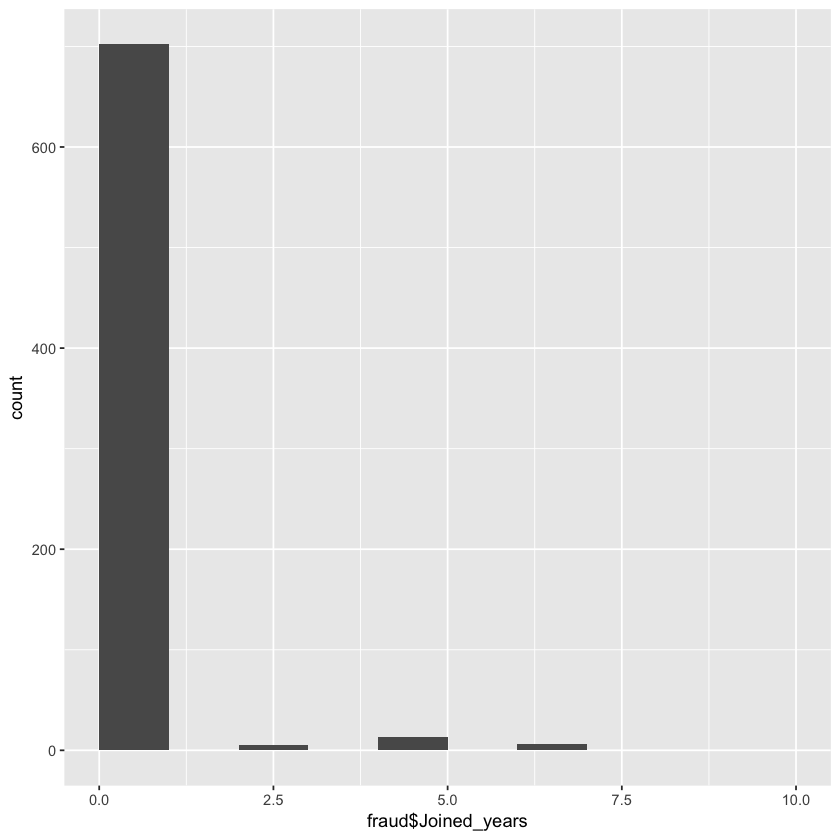

In [25]:
ggplot(fraud) +
  geom_histogram(aes(x=fraud$Joined_years), breaks=seq(0, 10, 1))

### plot a relation between time-interval and number of fraud times

time_category,Internal.RC,count
0.6,Fraud,122
0.7,Fraud,305
0.8,Fraud,260
0.9,Fraud,8
2.2,Fraud,1
2.7,Fraud,4


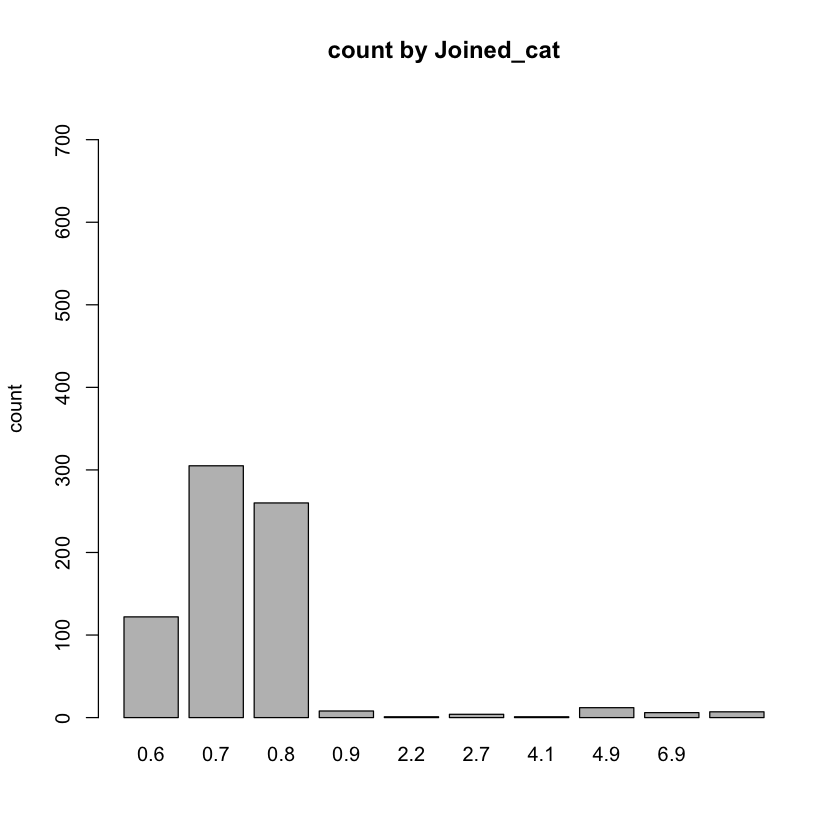

In [30]:
data1 <- group_by(fraud, time_category,Internal.RC)     
data1 <- summarise(data1, count=n()) 
head(data1)
barplot(data1$count,names=data1$time_category,ylab="count",
        main="count by Joined_cat",ylim=c(0,750))


### plot fraud times against country code

,Order_Number,Date.Logged,Released_by,Internal.RC,Defence.Status,GBP.Amount,Account_Key,Registered_Date,Country_Name,PostCode,⋯,Site_Key,Locale,SCV_Key,EDomain,X,Country_Code.x,Country_Code.y,Joined_years,time_category,Order_count
1,67879434,07/01/2016,Gatekeeper,Fraud,None,<a3>294.60,19694723,2016-03-17,France,59000,⋯,15,en_GB,28628877,outlook.fr,,FR,FR,0.8,0.8,2
2,67879434,07/01/2016,Gatekeeper,Fraud,None,<a3>294.60,19694723,2016-03-17,France,59000,⋯,15,en_GB,28628877,outlook.fr,,FR,FR,0.8,0.8,2
3,67138279,15/03/2016,Bypass,Fraud,Lost,<a3>124.94,19543294,2016-03-01,United Kingdom,SR81EZ,⋯,121,en_GB,28457015,cake.com,,UK,UK,0.8,0.8,1
10,67236325,16/03/2016,Gatekeeper,Fraud,None,<a3>129.94,19564129,2016-03-03,United Kingdom,BT222BH,⋯,121,en_GB,28479664,raid.com,,UK,UK,0.8,0.8,1
12,67337452,16/03/2016,Investigator,Fraud,Outstanding,<a3>96.93,19585639,2016-03-05,United Kingdom,BA151EA,⋯,121,en_GB,28504302,faded.com,,UK,UK,0.8,0.8,2
13,67337452,16/03/2016,Investigator,Fraud,Outstanding,<a3>96.93,19585639,2016-03-05,United Kingdom,BA151EA,⋯,121,en_GB,28504302,faded.com,,UK,UK,0.8,0.8,2


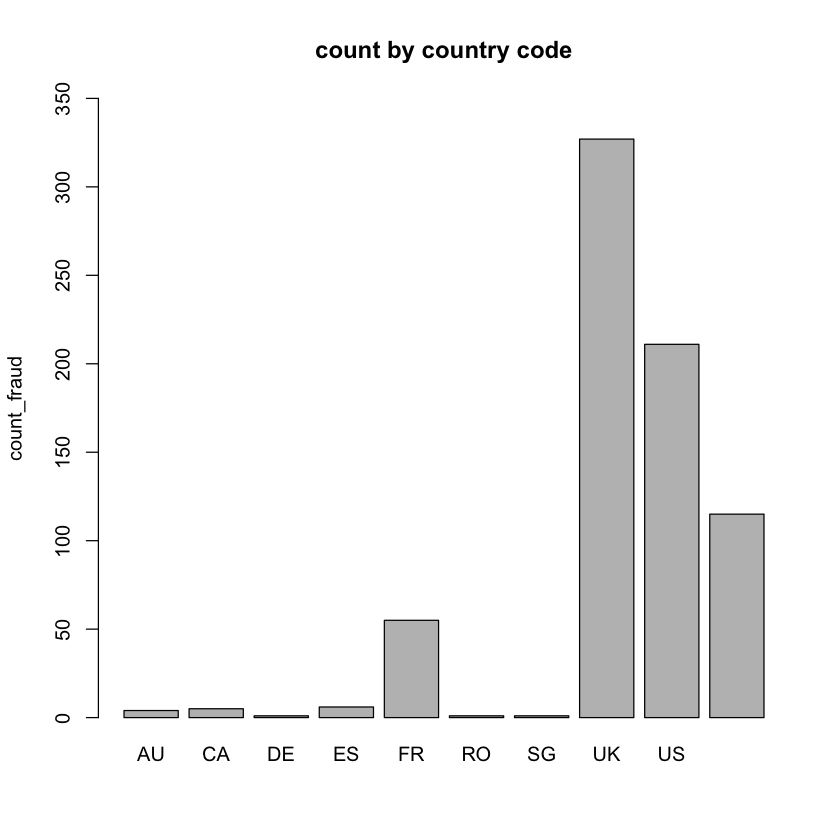

In [35]:
head(fraud)
data2 <- group_by(fraud, Country_Code.x)     
data2 <- summarise(data2, fraud_count=n()) 
barplot(data2$fraud_count,names=data2$Country_Code.x,ylab="count_fraud",
        main="count by country code",ylim=c(0,350))

### add new columns fraud transaction times and fraud flag to show whether it is a fraud transaction into the customer table, view the head rows of table and the flag of 1 too

In [48]:
data3 <- group_by(fraud,fraud$Account_Key)
data3 <- summarise(data3, fraud_count=n()) 
colnames(data3)[colnames(data3)=="fraud$Account_Key"]<- "Account_Key"
customers_main<-left_join(customers_main,data3,by="Account_Key")
customers_main<-customers_main%>%mutate(fraud_flag=ifelse(customers_main$fraud_count>0,"1","0"))
head(customers_main)
table(customers_main$fraud_flag)

Account_Key,Registered_Date,Country_Name,PostCode,First_Order_Placed,Site_Key,Locale,SCV_Key,EDomain,X,Country_Code.x,Country_Code.y,Joined_years,time_category,Order_count,fraud_count,fraud_flag
7605,2010-06-28,United Kingdom,KW1 5QQ,2010-06-29,121,en_GB,982885,gmail.com,,UK,UK,6.5,6.5,13,NA,NA
5170,2010-06-28,Spain,8032,2010-06-28,120,es_ES,5187134,gmail.com,,ES,ES,6.5,6.5,2,NA,NA
6412,2010-06-28,United Kingdom,DE21 7SA,2010-06-28,121,en_GB,2502778,hotmail.co.uk,,UK,UK,6.5,6.5,2,NA,NA
39661,2010-07-12,United Kingdom,DL5 7QX,2010-07-12,121,en_GB,4841243,hotmail.com,,UK,UK,6.5,6.5,1,NA,NA
37432,2010-07-12,United Kingdom,B21 8BE,2010-07-12,121,en_GB,6552130,tiscali.co.uk,,UK,UK,6.5,6.5,15,NA,NA
36829,2010-07-11,United Kingdom,BH23 1DW,2010-07-11,121,en_GB,1727308,tpsreport.co.uk,,UK,UK,6.5,6.5,1,NA,NA



  1 
362 

### save to local file

In [50]:
write.csv(customers_main, file = 'customers_main.csv', row.names = F)